<a href="https://colab.research.google.com/github/zainabkhosravi/CS-SBU-DataMining-Msc-projects/blob/zainabkhosravi-99422067/problem_solving3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection, tree
from scipy import stats
import torch

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data=pd.read_csv('/content/drive/My Drive/heart.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.drop(index = (data[data.ca == 4]).index, inplace = True)

data.drop(index = (data[data.thal == 0]).index, inplace = True)
data.loc[data.thal == 1, 'thal'] = 6
data.loc[data.thal == 3, 'thal'] = 7
data.loc[data.thal == 2, 'thal'] = 3

data.loc[data.cp == 0, 'cp'] = 4
data.loc[data.cp == 3, 'cp'] = 7
data.loc[data.cp == 2, 'cp'] = 3
data.loc[data.cp == 1, 'cp'] = 2
data.loc[data.cp == 7, 'cp'] = 1

data.loc[data.slope == 2, 'slope'] = 3
data.loc[data.slope == 1, 'slope'] = 2
data.loc[data.slope == 0, 'slope'] = 1

In [10]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

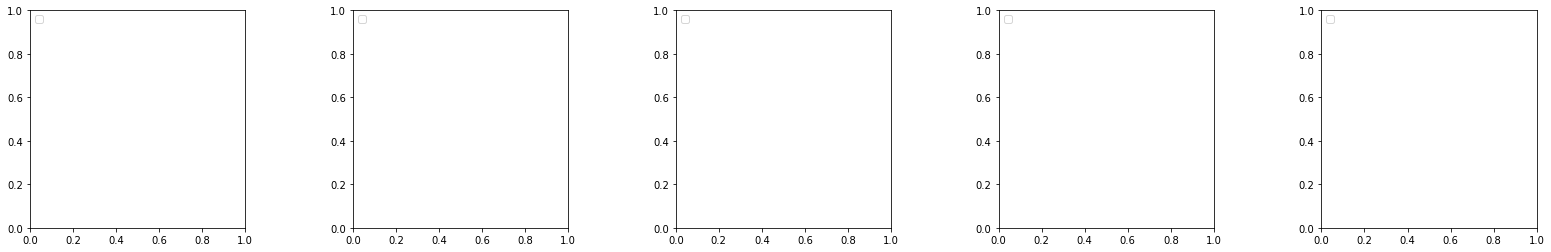

In [42]:
criterion_variables = ['age', 'trestbps', 'thalach', 'oldpeak', 'chol']

# Display plot
plt.figure(figsize=(27,4))
plt.subplots_adjust(wspace = 0.5)

for i in range(5):
    attr_col = list(data.columns).index(criterion_variables[i])
    cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(data.columns)))

  
    attributeNames = list(data.columns[cols])


    # Fit ordinary least squares regression model    
    model = lm.LinearRegression()
  
    
    plt.subplot(1, 5, i+1)
    plt.legend(['True values', 'Estimated values'], loc = 2);

In [78]:

attr_col = list(data.columns).index('thalach')

cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(data.columns)))

attributeNames = list(data.columns[cols])

K = 5
CV = model_selection.KFold(n_splits=K,shuffle=True)

Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))



print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print()
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

Linear regression without feature selection:

- Training error: 3.5e-323
- Test error:     3.5e-323
- R^2 train:     1.0
- R^2 test:     1.0

Linear regression with feature selection:

- Training error: 4.1
- Test error:     4.1
- R^2 train:     0.0
- R^2 test:     0.0


In [114]:

attr_col = list(data.columns).index('thalach')
cols = list(range(0, attr_col)) + list(range(attr_col + 1, len(data.columns)))


attributeNames = list(data.columns[cols])



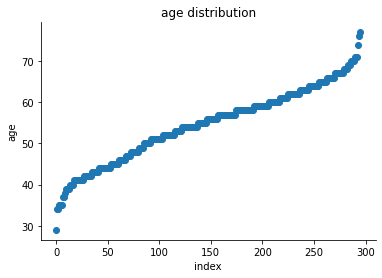

In [115]:
plt.scatter(range(data.shape[0]), np.sort(data['age'].values))
plt.xlabel('index')
plt.ylabel('age')
plt.title("age distribution")
sns.despine()

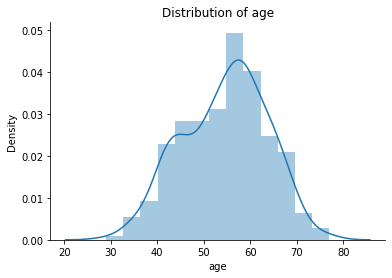

In [116]:
sns.distplot(data['age'])
plt.title("Distribution of age")
sns.despine()

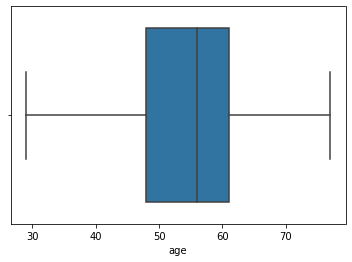

In [117]:
sns.boxplot(data.age)
plt.show()


In [118]:
print("Skewness: %f" % data['age'].skew())
print("Kurtosis: %f" % data['age'].kurt())

Skewness: -0.214413
Kurtosis: -0.526235


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.drop(index = (df[df.ca == 4]).index, inplace = True)

df.drop(index = (df[df.thal == 0]).index, inplace = True)
df.loc[df.thal == 1, 'thal'] = 6
df.loc[df.thal == 3, 'thal'] = 7
df.loc[df.thal == 2, 'thal'] = 3

df.loc[df.cp == 0, 'cp'] = 4
df.loc[df.cp == 3, 'cp'] = 7
df.loc[df.cp == 2, 'cp'] = 3
df.loc[df.cp == 1, 'cp'] = 2
df.loc[df.cp == 7, 'cp'] = 1

df.loc[df.slope == 2, 'slope'] = 3
df.loc[df.slope == 1, 'slope'] = 2
df.loc[df.slope == 0, 'slope'] = 1

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


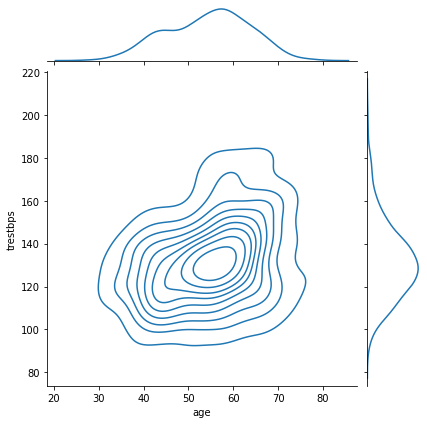

In [ ]:
sns.jointplot(data.age, data.trestbps, kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


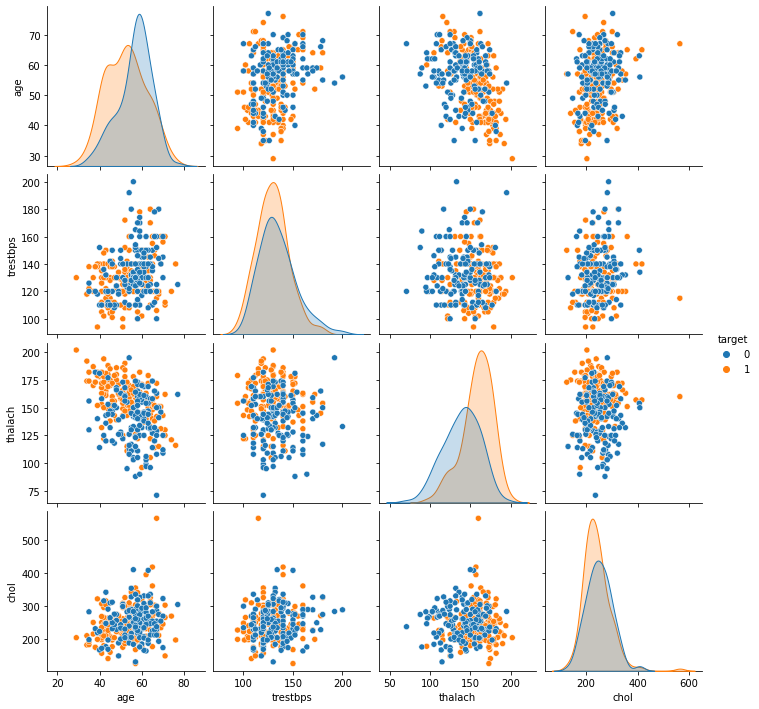

In [ ]:
sns.pairplot(data[['age','trestbps','thalach','chol','target']],hue='target',size=2.5);

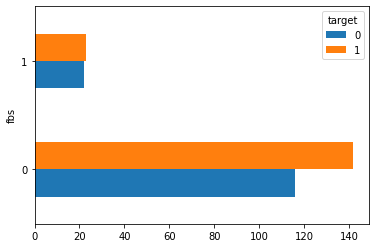

In [ ]:
pd.crosstab(data.fbs,data.target).plot(kind='barh');

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


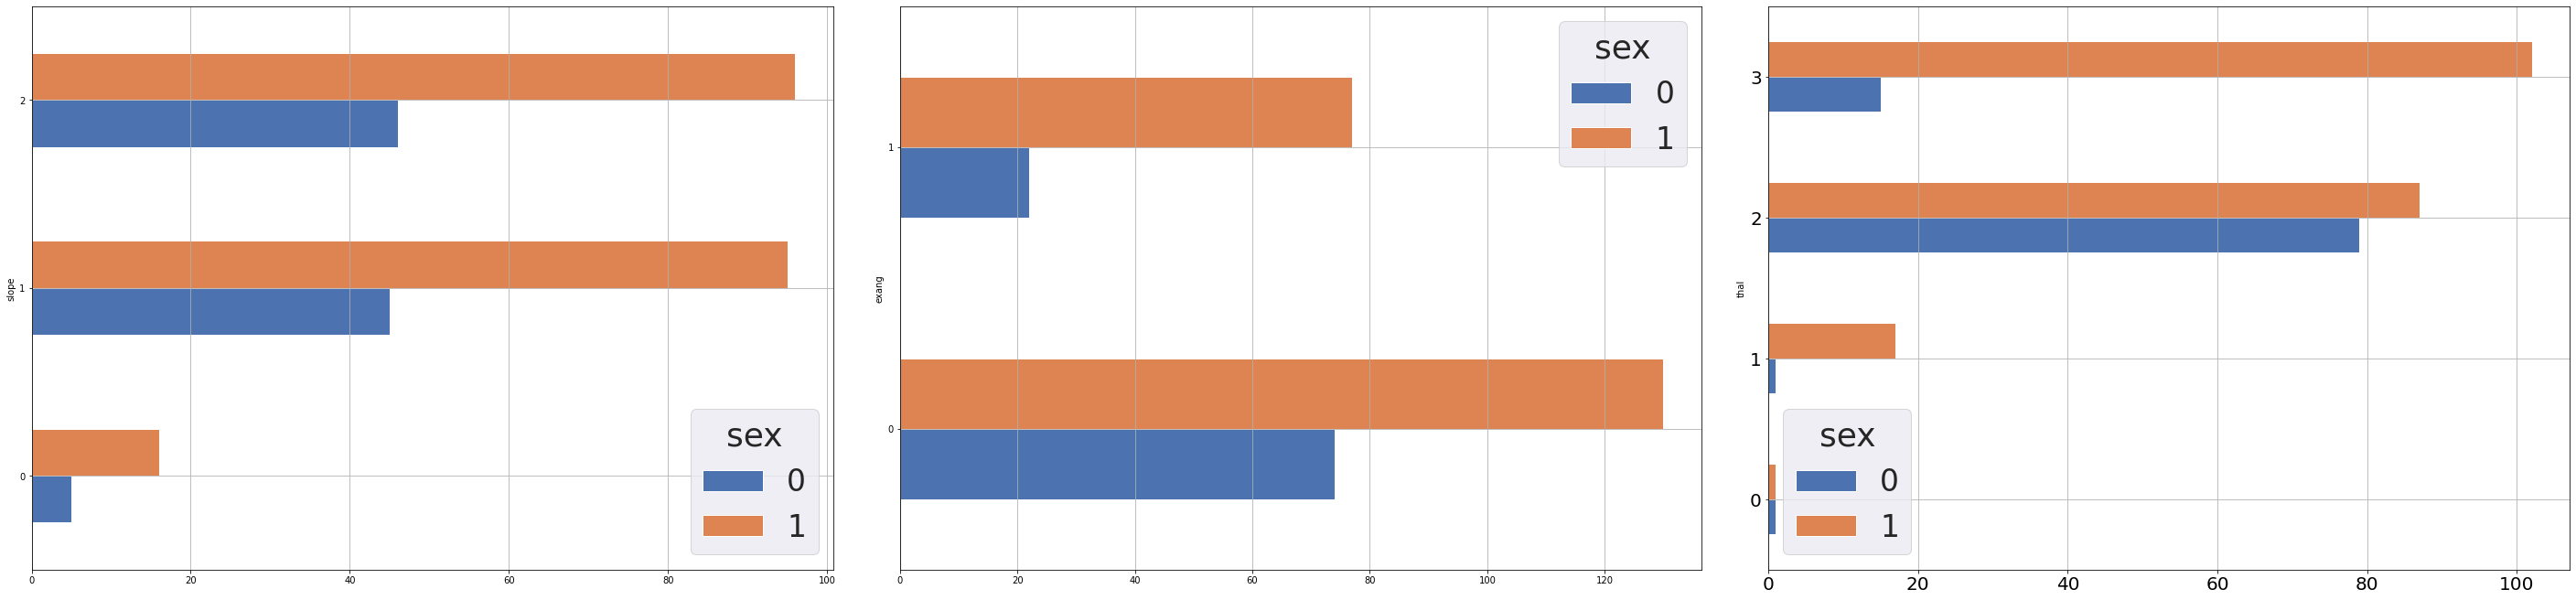

In [ ]:
f, axes = plt.subplots(1, 3,figsize=(40,10))
sns.set(font_scale=3)
pd.crosstab(data.slope,data.sex).plot(kind='barh', ax=axes[0]);
pd.crosstab(data.exang,data.sex).plot(kind='barh', ax=axes[1]);
pd.crosstab(data.thal,data.sex).plot(kind='barh', ax=axes[2]);
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
data_train, data_test, targ_train, targ_test = train_test_split(\
            data[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']],data.target, test_size=0.2)

In [ ]:
for cols in data.columns:
  if data[cols].dtype=='int64' or data[cols].dtype=='float64':
    if cols!='target':
      data[cols]= (data[cols]-data[cols].mean()) /(data[cols].std())
    

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
for cols in data.columns:
    if data[cols].dtype == 'int64' or data[cols].dtype == 'float64':
       upper_range = data[cols].mean() + 3 * data[cols].std()
       lower_range = data[cols].mean() - 3 * data[cols].std()

       indexs = data[(data[cols] > upper_range) | (data[cols] < lower_range)].index
       data=data.drop(indexs)


In [ ]:
data.shape

(287, 14)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
labels= data['target']
features=data.drop('target',axis=1)
x_train,x_test,y_train,y_test=train_test_split(features,labels,test_size=0.2,random_state=42)


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,1
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,1
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,1
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,1
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,1


In [ ]:
data["trestbps"].describe()

count    287.000000
mean      -0.034175
std        0.968852
min       -2.145254
25%       -0.662770
50%       -0.092585
75%        0.477601
max        2.758344
Name: trestbps, dtype: float64

In [ ]:
data["chol"].describe()

count    287.000000
mean      -0.034001
std        0.885974
min       -2.320322
25%       -0.680369
50%       -0.101562
75%        0.535126
max        2.850354
Name: chol, dtype: float64

In [ ]:
data["target"].describe()

count    287.000000
mean       0.550523
std        0.498310
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
data.target.value_counts()

1    158
0    129
Name: target, dtype: int64

In [ ]:
from sklearn.datasets import load_iris
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.naive_bayes import GaussianNB
>>> X, y = load_iris(return_X_y=True)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
>>> gnb = GaussianNB()
>>> y_pred = gnb.fit(X_train, y_train).predict(X_test)
>>> print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 75 points : 4


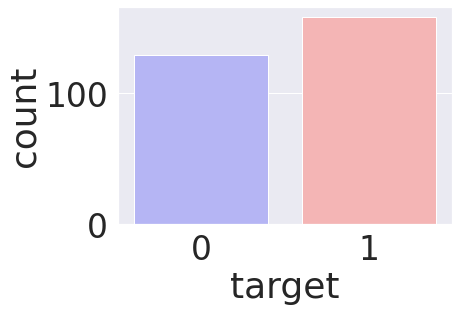

In [ ]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [ ]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%". format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 44.95%
Percentage of Patients Have Heart Disease: 55.05%


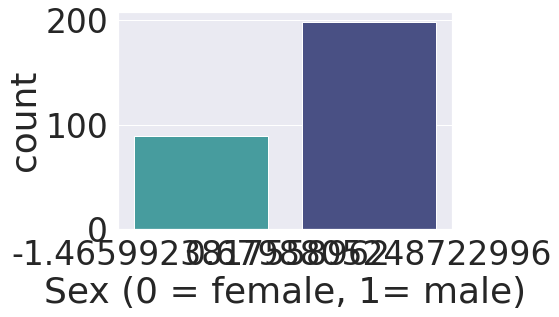

In [ ]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

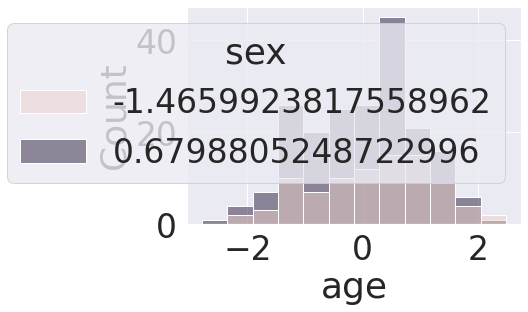

In [ ]:
sns.histplot(data=data, x="age", hue="sex")

Text(0.5, 1.0, 'Age distribution.')

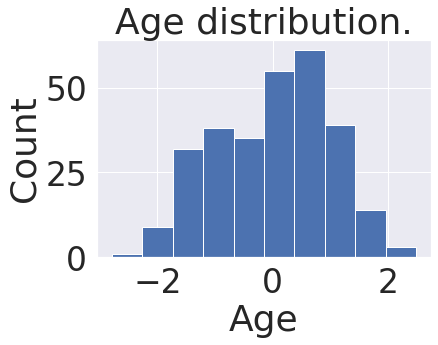

In [ ]:
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

In [ ]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,0.247307,0.347187,-0.448738,0.093499,0.063705,-0.003448,-0.134425,-0.462455,0.476070,0.40654,-0.333549,0.393514,0.374184
1,-0.208284,-0.257241,0.375401,-0.138416,-0.113773,-0.026037,0.127190,0.390105,-0.385622,-0.38625,0.307140,-0.447113,-0.305334


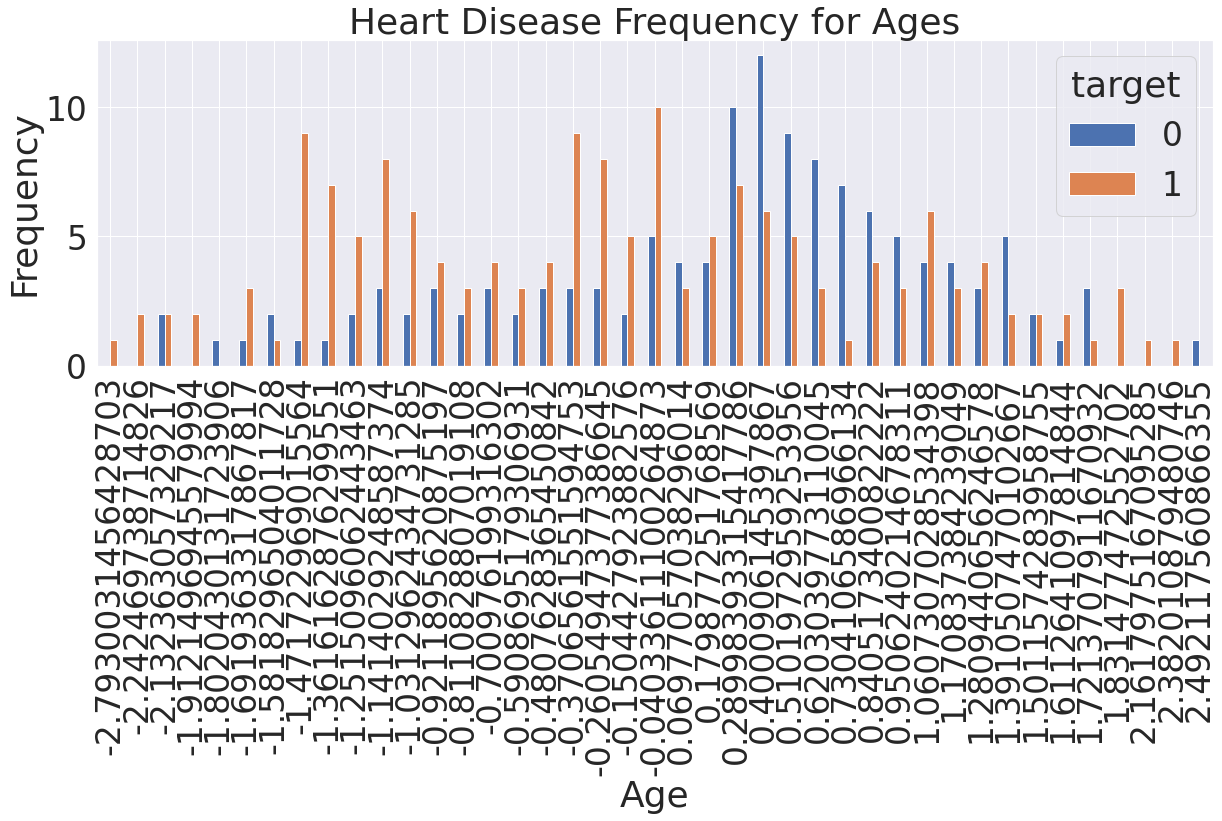

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

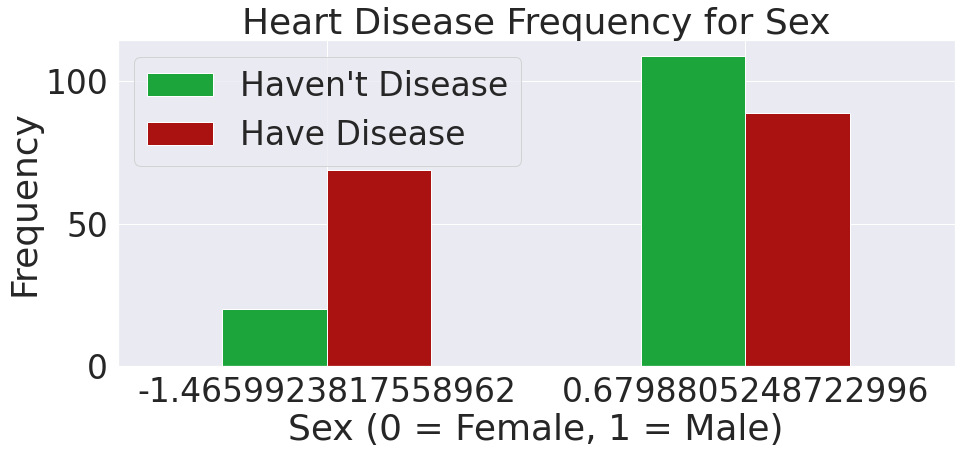

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

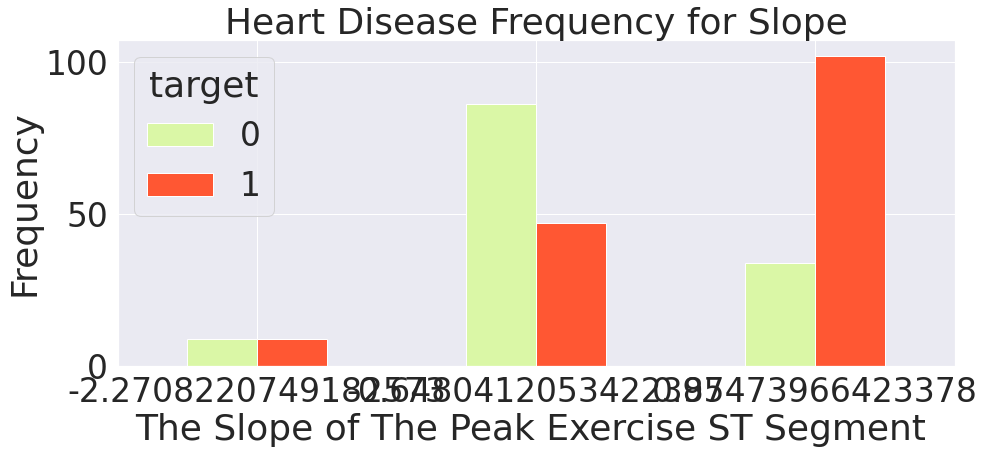

In [ ]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

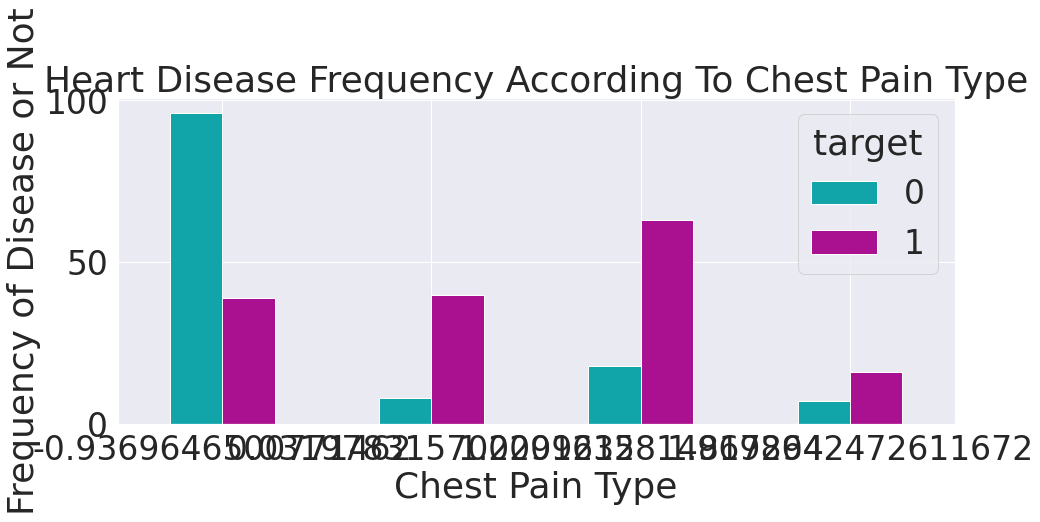

In [ ]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [ ]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_-0.9369646500771462,cp_0.031978315702291635,cp_1.0009212814817294,cp_1.9698642472611672,thal_-2.1453237834889043,thal_-0.5120747724408191,thal_1.1211742386072663,slope_-2.2708220749182573,slope_-0.6480412053422385,slope_0.97473966423378
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,1,0,0,0,1,1,0,0,1,0,0
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,1,0,0,1,0,0,1,0,1,0,0
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,1,0,1,0,0,0,1,0,0,0,1
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,1,0,1,0,0,0,1,0,0,0,1
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,1,1,0,0,0,0,1,0,0,0,1


In [ ]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_-0.9369646500771462,cp_0.031978315702291635,cp_1.0009212814817294,cp_1.9698642472611672,thal_-2.1453237834889043,thal_-0.5120747724408191,thal_1.1211742386072663,slope_-2.2708220749182573,slope_-0.6480412053422385,slope_0.97473966423378
0,0.950624,0.679881,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-0.713249,1,0,0,0,1,1,0,0,1,0,0
1,-1.912150,0.679881,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-0.713249,1,0,0,1,0,0,1,0,1,0,0
2,-1.471723,-1.465992,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,-0.713249,1,0,1,0,0,0,1,0,0,0,1
3,0.179877,0.679881,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,-0.713249,1,0,1,0,0,0,1,0,0,0,1
4,0.289984,-1.465992,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,-0.713249,1,1,0,0,0,0,1,0,0,0,1


In [ ]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3556455127179851


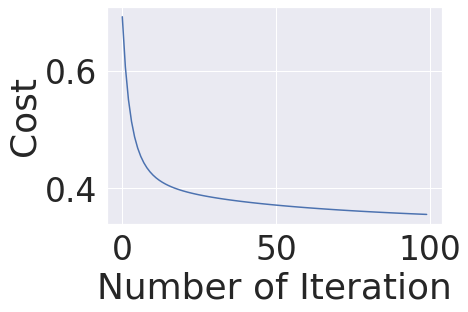

Manuel Test Accuracy: 87.93%


In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

In [ ]:
x = data[['age','sex','ca','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")

confussion matrix
[[19  4]
 [ 6 29]]
-------------------------------------------
Accuracy of Naive Bayes model: 82.75862068965517 

-------------------------------------------
confussion matrix
[[19  4]
 [ 6 29]]
-------------------------------------------
Accuracy of Naive Bayes model: 82.75862068965517 

-------------------------------------------


In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")


confussion matrix
[[19  4]
 [ 6 29]]
-------------------------------------------
Accuracy of Support Vector Classifier: 82.75862068965517 

-------------------------------------------


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:2f}%".format(acc))

In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))